In [1]:
from decision_tree import DecisionTree
from validation import KFoldValidator
import matplotlib.pyplot as plt
from matplotlib import colormaps, colors
import numpy as np

In [2]:
def plot_cm(confusion_matrix, title):
    labels = ['Room 1', 'Room 2', 'Room 3', 'Room 4']
    pale_blues = colors.LinearSegmentedColormap.from_list('pale_blues', colormaps.get_cmap('Blues')(np.linspace(0, 0.4, 256)))

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(confusion_matrix, cmap=pale_blues)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set_xlim(-0.5, len(labels) - 0.5)
    ax.set_ylim(len(labels) - 0.5, -0.5)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    ax.set_title(title)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    plt.show()

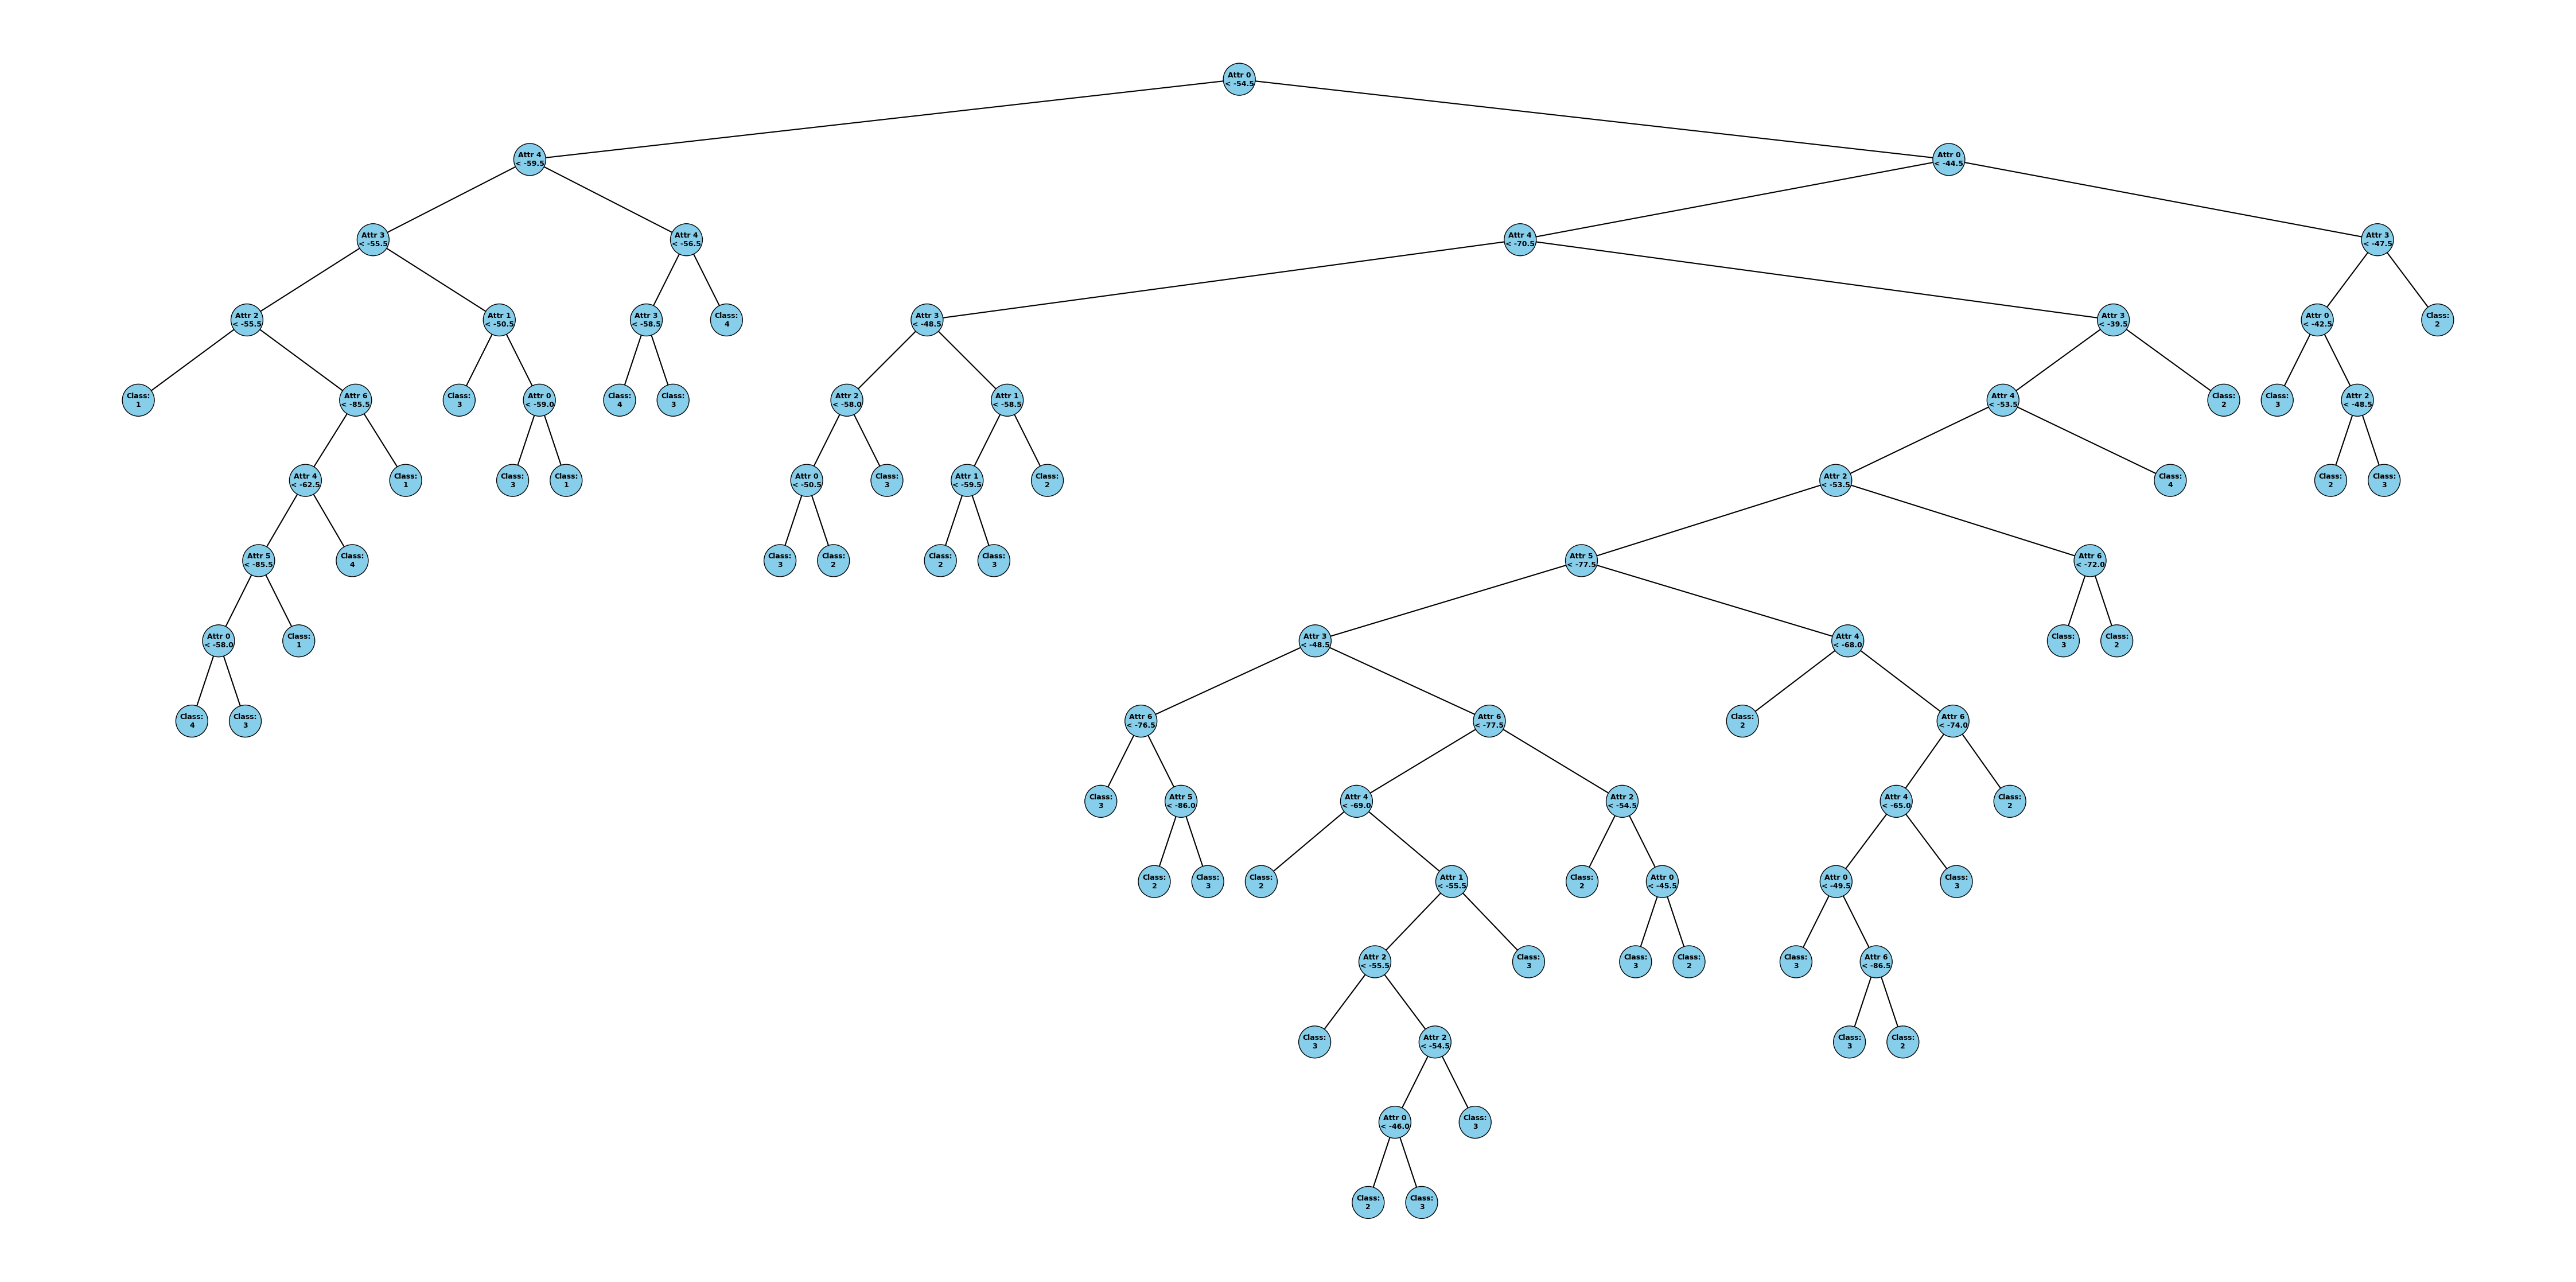

In [3]:
clean_validator = KFoldValidator('../wifi_db/clean_dataset.txt', 10)
data = clean_validator.data
model = DecisionTree(4)
model.root, model.depth = model.decision_tree_learning(data, 0)
model.draw_tree()

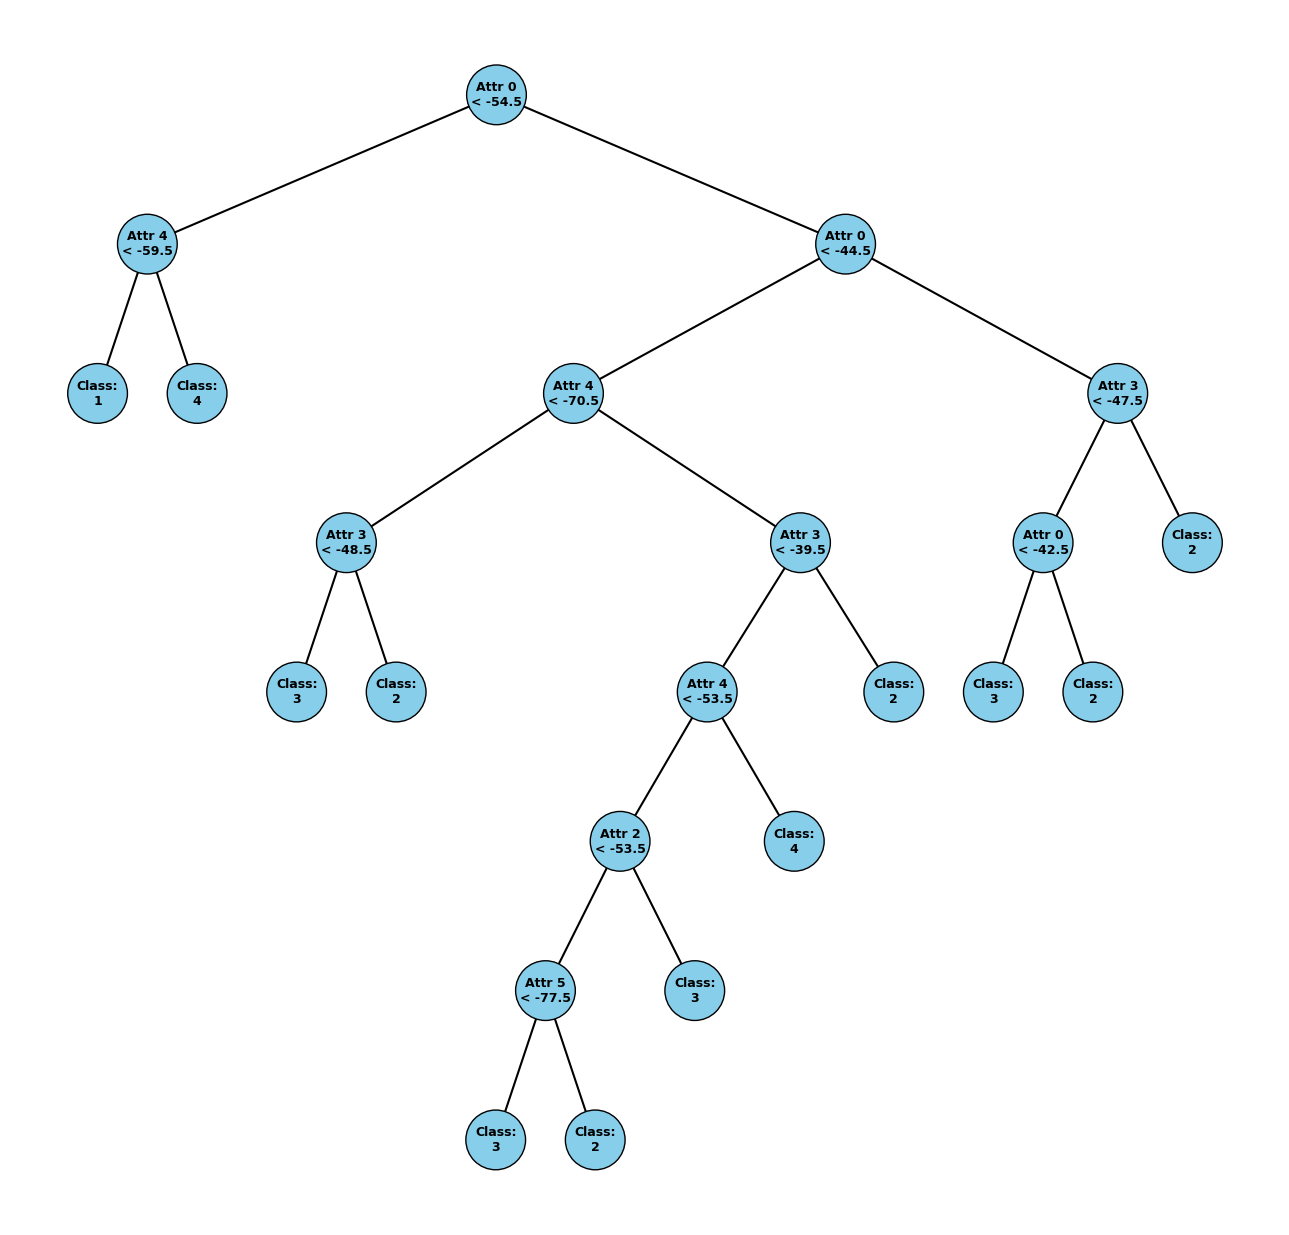

In [4]:
train, val = clean_validator.split_validation(data)
pruned_model = DecisionTree(4)
pruned_model.root, pruned_model.depth = pruned_model.decision_tree_learning(train, 0)
pruned_model.prune(val, pruned_model.root, clean_validator.compute_accuracy, clean_validator.confusion_matrix)
pruned_model.draw_tree()

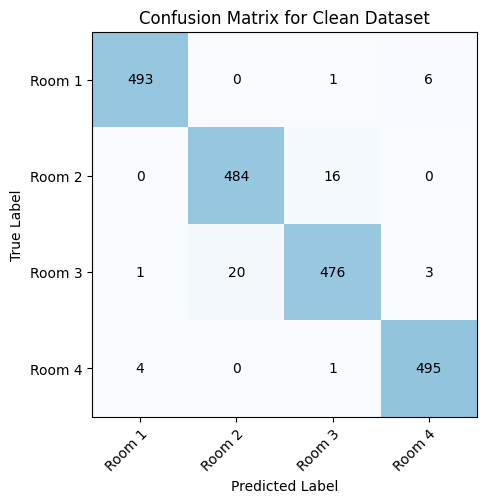

In [5]:
clean_results = clean_validator.validate()
plot_cm(clean_results['confusion_matrix'], "Confusion Matrix for Clean Dataset")

In [6]:
noisy_validator = KFoldValidator('../wifi_db/noisy_dataset.txt', 10)
data = noisy_validator.data

model = DecisionTree(4)
model.root, model.depth = model.decision_tree_learning(data, 0)
model.draw_tree()

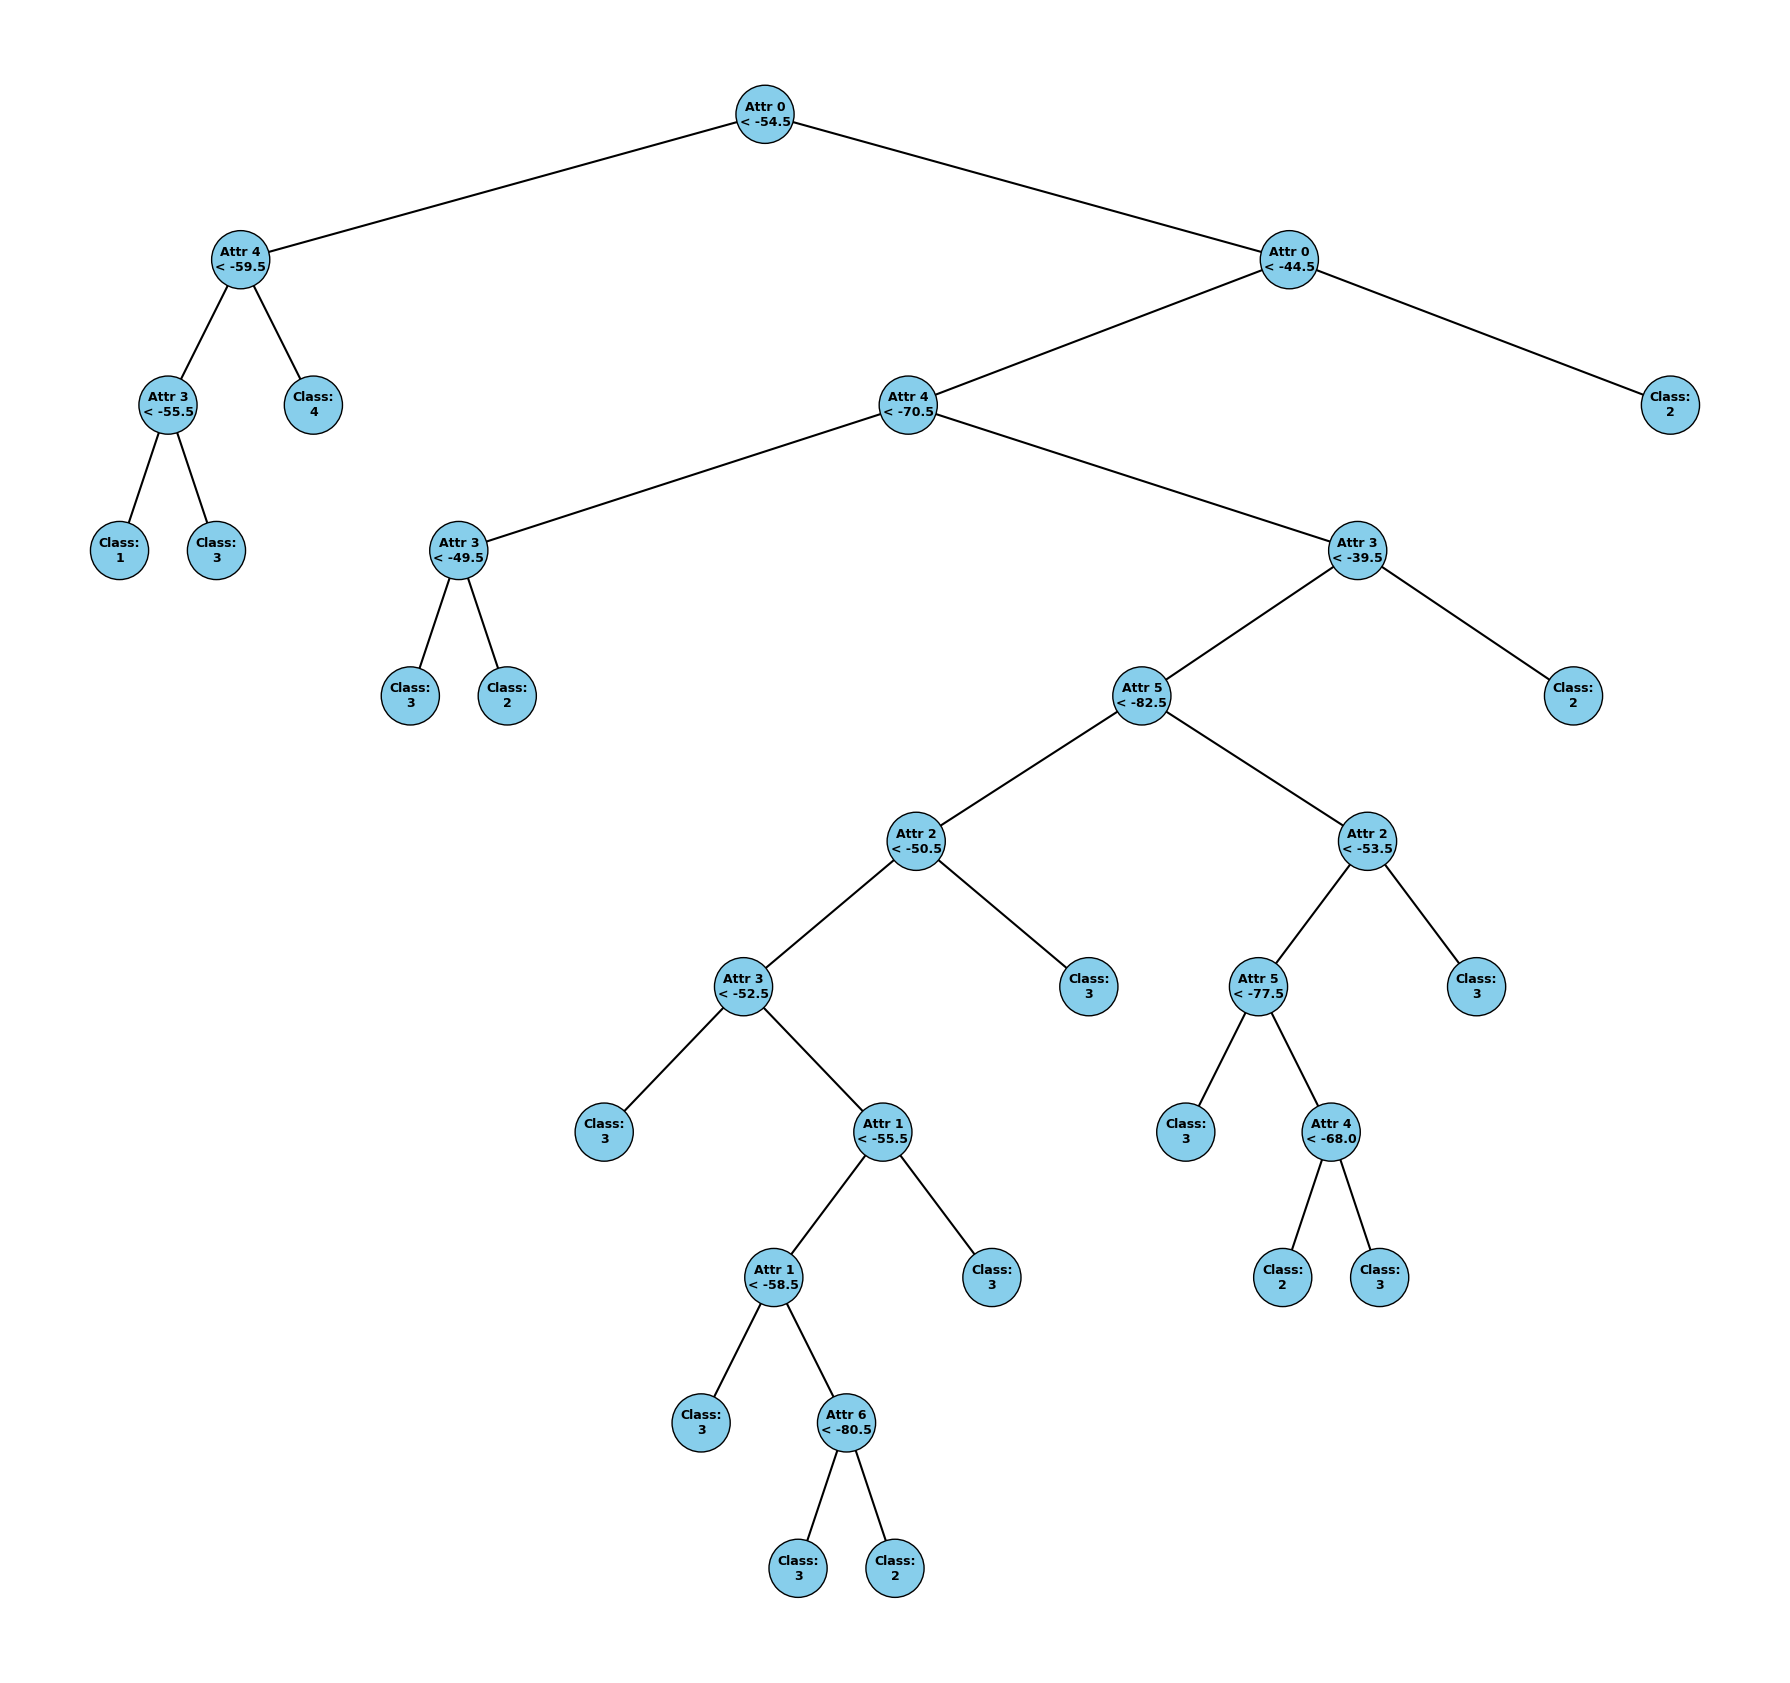

In [7]:

train, val = noisy_validator.split_validation(data)
pruned_model = DecisionTree(4)
pruned_model.root, pruned_model.depth = pruned_model.decision_tree_learning(train, 0)
pruned_model.prune(val, pruned_model.root, noisy_validator.compute_accuracy, noisy_validator.confusion_matrix)
pruned_model.draw_tree()

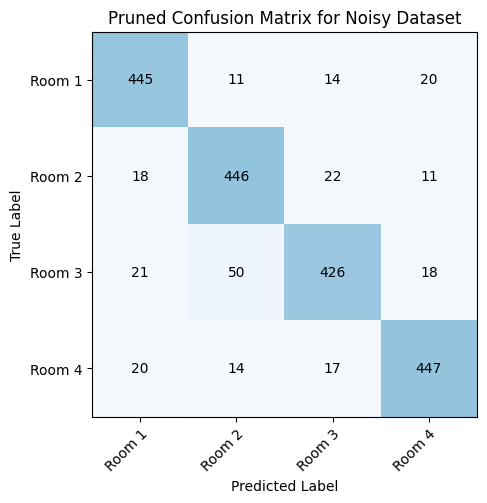

In [8]:
noisy_results = noisy_validator.k_fold_validation()
plot_cm(noisy_results['confusion_matrix'], "Pruned Confusion Matrix for Noisy Dataset")